### 머신러닝 프로젝트 간단 작업

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
column_names = ['country',2019,2020,2021,2022]

In [3]:
# 파일 불러오기
gdp = pd.read_excel(r'D:\Portfolio\hands on machine learning dataset\Real one gdp.xlsx')
happy = pd.read_csv('D:\Portfolio\hands on machine learning dataset\BLI_06032021093348963.csv',sep = '\t')

**gdp 데이터** : 국가의 1인당 gdp


**happy** : 삶의 만족도

### 데이터 전처리

In [51]:
# 컬럼명 변경
gdp.columns = ['Country',2019,2020,2021,2022]

In [5]:
gdp.head()

,Country,2019,2020,2021,2022
0,Argentina,-2.1,-10.4,4.5,2.7
1,Australia,1.9,-2.9,3.5,2.9
2,Brazil,1.4,-4.5,3.6,2.6
3,Canada,1.9,-5.5,3.6,4.1
4,China,6.0,2.3,8.1,5.6


In [6]:
happy.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


In [7]:
# 나라별 행복도만 추출
new_happy = pd.DataFrame(happy[['Country','Value']])

In [8]:
new_happy

,Country,Value
0,Australia,5.40
1,Austria,3.50
2,Belgium,3.70
3,Canada,6.00
4,Czech Republic,3.10
5,Denmark,4.20
6,Finland,3.90
7,France,7.60
8,Germany,2.70
9,Greece,29.80


In [9]:
# 나라별 만족도 총점
gp_new_happy = new_happy.groupby('Country').sum()

In [10]:
gp_happy = pd.DataFrame(gp_new_happy)
gp_happy = gp_happy.reset_index().rename(columns = {"index" : 'country'})

In [11]:
gp_happy.head()

,Country,Value
0,Australia,513244.30
1,Austria,396925.53
2,Belgium,470739.36
3,Brazil,3496.52
4,Canada,507293.51


In [12]:
# 데이터 수 확인
print(gp_happy.shape,gdp.shape)

(41, 2) (30, 5)


In [13]:
# gdp별 정렬
gp_happy.sort_values('Value',ascending = False)

,Country,Value
23,Luxembourg,875811.56
40,United States,742696.82
39,United Kingdom,625485.72
0,Australia,513244.30
4,Canada,507293.51
28,OECD - Total,489916.05
2,Belgium,470739.36
35,Spain,440722.46
26,New Zealand,433299.37
1,Austria,396925.53


In [14]:
# 데이터 병합
gdp_happy = pd.merge(gp_happy,gdp,on = 'Country')
gdp_happy.shape

(17, 6)

나라를 기준으로 2개의 데이터를 병합한 결과, 41,30개국에서 17개의 나라로 줄어들었다.

In [15]:
gdp_happy

,Country,Value,2019,2020,2021,2022
0,Australia,513244.30,1.9,-2.9,3.5,2.9
1,Brazil,3496.52,1.4,-4.5,3.6,2.6
2,Canada,507293.51,1.9,-5.5,3.6,4.1
3,France,360432.07,1.5,-9.0,5.5,4.1
4,Germany,346297.74,0.6,-5.4,3.5,3.1
5,Italy,347716.13,0.3,-9.2,3.0,3.6
6,Japan,380848.79,0.3,-5.1,3.1,2.4
7,Korea,347445.81,2.0,-1.1,3.1,2.9
8,Mexico,19210.62,-0.1,-8.5,4.3,2.5
9,Netherlands,244705.22,1.7,-4.1,3.0,2.9


나라별 만족도 차이가 크기때문에 표준화를 진행

In [16]:
gdp_happy['standard_Value'] = (gdp_happy['Value'] - gdp_happy['Value'].mean())/((gdp_happy['Value'].std()))

In [25]:
gdp_happy

,Country,Value,2019,2020,2021,2022,standard_Value,scaler_Value
0,Australia,513244.30,1.9,-2.9,3.5,2.9,0.905472,0.933339
1,Brazil,3496.52,1.4,-4.5,3.6,2.6,-1.290416,-1.330130
2,Canada,507293.51,1.9,-5.5,3.6,4.1,0.879837,0.906915
3,France,360432.07,1.5,-9.0,5.5,4.1,0.247189,0.254796
4,Germany,346297.74,0.6,-5.4,3.5,3.1,0.186301,0.192034
5,Italy,347716.13,0.3,-9.2,3.0,3.6,0.192411,0.198333
6,Japan,380848.79,0.3,-5.1,3.1,2.4,0.335140,0.345454
7,Korea,347445.81,2.0,-1.1,3.1,2.9,0.191246,0.197132
8,Mexico,19210.62,-0.1,-8.5,4.3,2.5,-1.222723,-1.260354
9,Netherlands,244705.22,1.7,-4.1,3.0,2.9,-0.251339,-0.259074


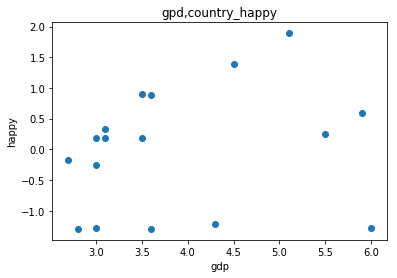

In [33]:
# 산점도
plt.scatter(gdp_happy[2021],gdp_happy["standard_Value"])
plt.title("gpd,country_happy")
plt.xlabel("gdp")
plt.ylabel("happy")
plt.show()

### 선형회귀

In [30]:
import sklearn.linear_model

In [40]:
print(gdp_happy[[2021]].shape)
print(gdp_happy['Value'].shape)

(17, 1)
(17,)


In [47]:
model = sklearn.linear_model.LinearRegression()

In [48]:
lin_model = model.fit(gdp_happy[[2021]],gdp_happy['Value'])

In [49]:
# 2021년 gdp가 -1인 임의의 국가
x_new = [[1]]

In [50]:
# 임의의 국과 모델 결과
print(lin_model.predict(x_new))

[180434.48897806]


2021년 gdp가 '1'인 국가는 약 180434만의 행복도를 보유하고 있다고 예측된다 <br><br>

현재까지의 작업 간단 요약
>1. 데이터를 분석<br><br>
>2. 모델 선택<br><br>
>3. 훈련데이터로 모델을 훈련<br><br>
>4. 새로운 데이터에 모델을 적용해 예측

### 머신러닝 알고리즘이 잘 작동, 일반화를 잘 하기 위해선
>1. 훈련데이터가 기본적으로 어느정도 있어야함.<br>
>2. 일반화하기 원하는 새로운 사례를 훈련 데이터가 잘 대표하는 것이 중요함.**(앞선 모델에선 모델 훈련을 위해 일부 나라가 빠져 대표성이 부족하다고 볼 수 있음.)**
>3. 질 나쁜 데이터 (에러, 이상치 등으로 가득한 데이터)로 모델을 돌린다면 패턴을 찾기 어려울 것. 그렇기에 데이터 정제에 충분한 시간을 사용할 만하다.
>> 데이터 정제 - 이상치, na값 제거 및 대체<br>
>4. 훈련에 유용한 특성 선택
>5. 과대적합, 과소적합에 대한 주의 필요
>> **과대적합** : 모델이 훈련 데이터엔 잘 맞지만 일반화에서의 성능이 떨어짐
>>> 모델이 너무 복잡하거나 훈련데이터셋에 잡음이 많은경우, 데이터셋이 작은 경우, 관련없는 특성이 많은 경우 -> 훈련 데이터셋에 존재하는 너무 구체적인 패턴으로 훈련이 진행될 수 있다.
>>>> 해결 방안 :<br> 1. 훈련 데이터를 더 모은다<br>2. 파라미터 수가 적은 모델을 선택하거나, 훈련 데이터에 있는 특성 수를 줄이거나, 모델에 제약을 걸어 단순화 시킨다.<br>3.훈련 데이터내의 잡음을 줄인다

>>> **과소적합** : 모델이 너무 단순해서 데이터의 구조를 제대로 학습하지 못할 때 반영됨.
>>>> 해결방안 :<br>1.모델 파라미터가 더 많은 강력한 모델 선택<br>2.학습 알고리즘에 더 좋은 특성을 제공<br>3.모델의 제약을 줄인다